In [1]:
version()

'SageMath version 10.3, Release Date: 2024-03-19'

In [2]:
%display latex

In [3]:
Parallelism().set(nproc=8)

In [4]:
a = var('a')
a0 = 0.95

In [5]:
2+2

4

In [6]:
from kerrgeodesic_gw import KerrBH
M = KerrBH(a)
print(M)

Kerr spacetime M


In [7]:
rH = M.event_horizon_radius()
rH0 = rH.subs({a: a0})
show(LatexExpr(r'r_+ = '), rH0)
show(LatexExpr(r'r_- = '),
     M.inner_horizon_radius().subs({a: a0}))

r_+ =  1.31224989991992

r_- =  0.687750100080080

In [8]:
BL.<t, r, th, ph> = M.boyer_lindquist_coordinates()
BL

Chart (M, (t, r, th, ph))

In [9]:
g = M.metric()
g.display()

g = -(a^2*cos(th)^2 + r^2 - 2*r)/(a^2*cos(th)^2 + r^2) dt⊗dt - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dt⊗dph + (a^2*cos(th)^2 + r^2)/(a^2 + r^2 - 2*r) dr⊗dr + (a^2*cos(th)^2 + r^2) dth⊗dth - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph⊗dt + (2*a^2*r*sin(th)^4 + (a^2*r^2 + r^4 + (a^4 + a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2) dph⊗dph

In [10]:
r = var('r')
lsph(a, r) = (r^2*(3 - r) - a^2*(r + 1))/(a*(r -1))
lsph

(a, r) |--> -(a^2*(r + 1) + (r - 3)*r^2)/(a*(r - 1))

In [11]:
qsph(a, r) = r^3 / (a^2*(r - 1)^2) * (4*a^2 - r*(r - 3)^2)
qsph

(a, r) |--> -((r - 3)^2*r - 4*a^2)*r^3/(a^2*(r - 1)^2)

In [12]:
theta0(a, l, q) = arccos(sqrt(1/2*(1 - (l^2+q)/a^2 + sqrt((1 - (l^2+q)/a^2)^2 + 4*q/a^2))))
theta0

(a, l, q) |--> arccos(sqrt(1/2*sqrt(((l^2 + q)/a^2 - 1)^2 + 4*q/a^2) - 1/2*(l^2 + q)/a^2 + 1/2))

In [13]:
theta1(a, l, q) = arccos(sqrt(1/2*(1 - (l^2+q)/a^2 - sqrt((1 - (l^2+q)/a^2)^2 + 4*q/a^2))))
theta1

(a, l, q) |--> arccos(sqrt(-1/2*sqrt(((l^2 + q)/a^2 - 1)^2 + 4*q/a^2) - 1/2*(l^2 + q)/a^2 + 1/2))

In [14]:
r0 = 3.
E = 1
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(-1.90000000000000, 27.0000000000000)

In [15]:
theta0(a0, L, Q)
P = M.point((0, r0, pi/2, 0), name='P')
print(P)
lmax = 100 # lambda_max
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)


Point P on the Kerr spacetime M
Initial tangent vector: 


p = 3.00000000000000 ∂/∂t + (9.36596633575423e-9) ∂/∂r + 0.577350269189626 ∂/∂th

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [16]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.00000000000000 ∂/∂t + 0.577350269189626 ∂/∂th

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [17]:
text_properties = {
    'fontsize': 16,
    'zorder': 101, 
}
Li.integrate(step=0.001, method='dopri5')
Li.check_integrals_of_motion(0.999*lmax)
print("Final point: ")
show(BL[:], "=", BL(Li(0.999*lmax)))
lplot = 0.32*lmax
print("max lambda (plot): ", lplot)
plot = Li.plot(prange=(0, lplot), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.5, width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey') \
     + line([(0,0,-3), (0,0,3)], color='black', thickness=2)
plot += text3d(r'FUW Reproduced', (2.9, 0, 3.5), color='black',**text_properties )
plot.save("geodesic_plot_with_text.png")
plot

Final point: 


(t, r, th, ph) '=' (291.1717434700641, 3.0, 2.1444938618806284, -39.5566780356545)

max lambda (plot):  32.0000000000000


Graphics3d Object

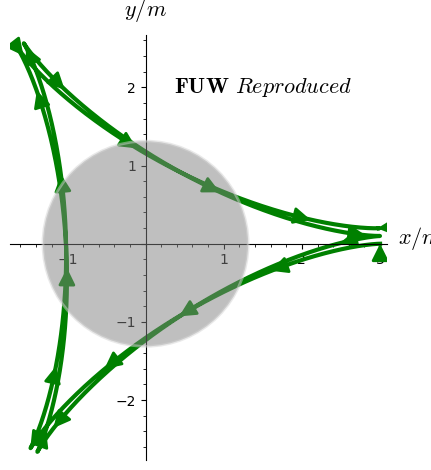

In [19]:
graph = Li.plot(coordinates='xy', prange=(0, lplot), plot_points=2000, 
                thickness=3, color='green', display_tangent=True, scale=0.15, 
                width_tangent=2, color_tangent='green', plot_points_tangent=20, 
                horizon_color='lightgrey', axes_labels=[r'$x/m$', r'$y/m$'])
graph += text(r'$\mathbf{FUW}$ $\mathit{Reproduced}$', (1.5,2), color='black',**text_properties )
graph.save("gik_spher_3d_r_30_xy.pdf")
graph

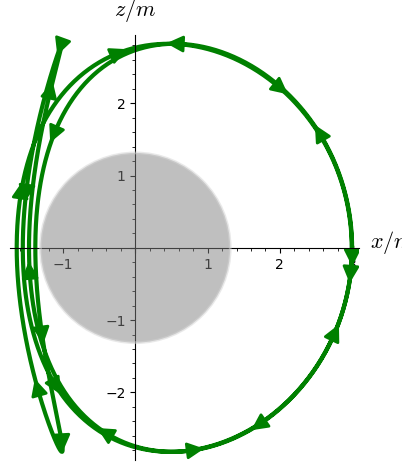

In [19]:
Li.plot(coordinates='xz', prange=(0, lplot), plot_points=2000, 
        thickness=3, color='green', display_tangent=True, scale=0.15, 
        width_tangent=2, color_tangent='green', plot_points_tangent=20, 
        horizon_color='lightgrey', axes_labels=[r'$x/m$', r'$z/m$'])


In [20]:
r0 = 1.6
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q


(2.17105263157895, 5.97569713758080)

In [21]:
theta0(a0, L, Q)

0.705442812649839

In [22]:
P = M.point((0, r0, pi/2, 0), name='P')
lmax = 70
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 7.66666666666666 ∂/∂t + (1.74608999691187e-24 + 2.85158136717879e-8*I) ∂/∂r + 0.954892151626195 ∂/∂th + 2.45614035087719 ∂/∂ph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [23]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 7.66666666666666 ∂/∂t + 0.954892151626195 ∂/∂th + 2.45614035087719 ∂/∂ph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [24]:
Li.integrate(step=0.0004, method='dopri5')
Li.check_integrals_of_motion(0.999*lmax)

quantity,value,initial value,diff.,relative diff.
\(\mu^2\),\(-2.7489917026751742 \times 10^{-11}\),\(-3.55271367880050 \times 10^{-15}\),\(-2.749 \times 10^{-11}\),\(7737.\)
\(E\),\(1.00000000000843\),\(1.00000000000000\),\(8.429 \times 10^{-12}\),\(8.429 \times 10^{-12}\)
\(L\),\(2.17105263160440\),\(2.17105263157895\),\(2.545 \times 10^{-11}\),\(1.172 \times 10^{-11}\)
\(Q\),\(5.97569713765721\),\(5.97569713758080\),\(7.642 \times 10^{-11}\),\(1.279 \times 10^{-11}\)


In [25]:
print("Final point: ")
show(BL[:], "=", BL(Li(0.999*lmax)))

Final point: 


(t, r, th, ph) '=' (493.3106521219041, 1.5826701927123354, 0.8401458221596447, 185.17160640854624)

In [26]:
lplot = 0.11*lmax
print("max lambda (plot): ", lplot)
Li.plot(prange=(0, lplot), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.03, width_tangent=1, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey') \
    + line([(0,0,-1.5), (0,0,1.5)], color='black', thickness=2)

max lambda (plot):  7.70000000000000


Graphics3d Object

In [27]:
Li.plot(prange=(0, lmax), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.03, width_tangent=1, color_tangent='green', 
        plot_points_tangent=40, horizon_color='lightgrey') \
    + line([(0,0,-1.5), (0,0,1.5)], color='black', thickness=2)


Graphics3d Object

In [28]:
r0 = 2.8
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q


(-1.08859649122807, 26.2604206422489)

In [29]:
theta0(a0, L, Q)

0.206050206829550

In [30]:
P = M.point((0, r0, pi/2, 0), name='P')
lmax = 100
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.22222222222222 ∂/∂t + (4.65527024480212e-25 + 7.60263326216718e-9*I) ∂/∂r + 0.653634213345212 ∂/∂th + 0.116959064327486 ∂/∂ph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [31]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.22222222222222 ∂/∂t + 0.653634213345212 ∂/∂th + 0.116959064327486 ∂/∂ph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [32]:
Li.integrate(step=0.001, method='dopri5')
Li.check_integrals_of_motion(0.999*lmax)

quantity,value,initial value,diff.,relative diff.
\(\mu^2\),\(3.1828151225710144 \times 10^{-12}\),\(2.53616572187809 \times 10^{-15}\),\(3.180 \times 10^{-12}\),\(1254.\)
\(E\),\(1.00000000000018\),\(1.00000000000000\),\(1.770 \times 10^{-13}\),\(1.770 \times 10^{-13}\)
\(L\),\(-1.08859649122857\),\(-1.08859649122807\),\(-5.047 \times 10^{-13}\),\(4.636 \times 10^{-13}\)
\(Q\),\(26.2604206422338\),\(26.2604206422489\),\(-1.510 \times 10^{-11}\),\(-5.748 \times 10^{-13}\)


In [33]:
print("Final point: ")
show(BL[:], "=", BL(Li(0.999*lmax)))

Final point: 


(t, r, th, ph) '=' (310.42287690816426, 2.8, 2.462502125953985, -39.070054589838705)

In [34]:
lplot = 0.38*lmax
print("max lambda (plot): ", lplot)
Li.plot(prange=(0, lplot), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.12, width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')


max lambda (plot):  38.0000000000000


Graphics3d Object

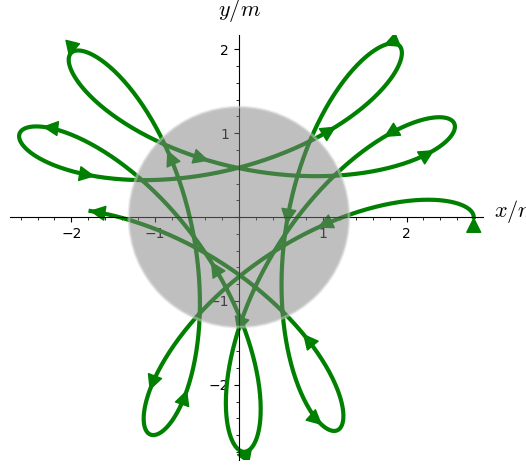

In [35]:
graph = Li.plot(coordinates='xy', prange=(0, lplot), plot_points=2000, 
                thickness=3, color='green', display_tangent=True, scale=0.01, 
                width_tangent=1, color_tangent='green', 
                plot_points_tangent=20, horizon_color='lightgrey',
                axes_labels=[r'$x/m$', r'$y/m$'])
graph.save("gik_spher_3d_r_28_xy.pdf")
graph

In [53]:
Li.plot(coordinates='txy', prange=(0, lplot), plot_points=2000, 
        thickness=3, color='green', display_tangent=True, scale=0.2, 
        width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')

Graphics3d Object